# [Ridge Regression Models](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)

[Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:\
\
$ min_{w} ||Xw - y||_2^2 + \alpha ||w||_2^2 $

The complexity parameter $ \alpha \geq 0 $ controls the amount of shrinkage: the larger the value of $ \alpha$ , the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

In [1]:
from sklearn import linear_model

reg = linear_model.Ridge(alpha=.5, solver='sparse_cg')
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])


print(reg.coef_)
print(reg.intercept_)

[0.34545455 0.34545455]
0.13636363636363644


### This example also shows the usefulness of applying Ridge regression to highly ill-conditioned matrices.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

In [3]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

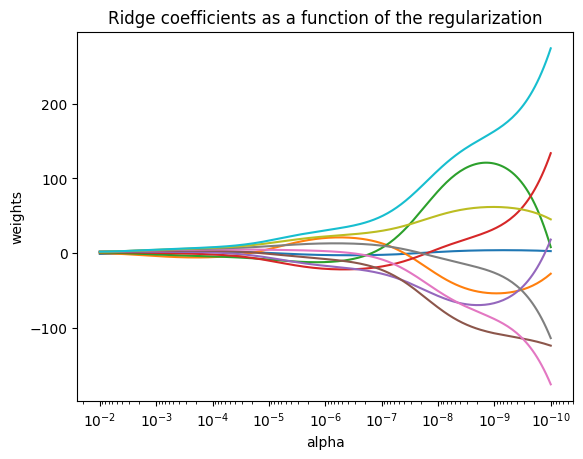

In [6]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

### Setting the regularization parameter

RidgeCV and RidgeClassifierCV implement ridge regression/classification with built-in cross-validation of the alpha parameter. They work in the same way as GridSearchCV except that it defaults to efficient Leave-One-Out cross-validation. When using the default cross-validation, alpha cannot be 0 due to the formulation used to calculate Leave-One-Out error. 

In [4]:
import numpy as np
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg.alpha_

0.01